In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def generateYTrue(x, true_weights, mu=0.0, std=0.1):
    np.random.seed(43)
    y_true = np.array([], dtype=float)
    for i in x:
        y_true = np.append(y_true, np.dot([1, i], true_weights))
    noise = np.random.normal(mu, std, size = y_true.shape)
    y_true += noise
    return y_true

In [3]:
def drawDataset(x, y_true):
    plt.scatter(x, y_true)
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')

def drawTrueFunction(x, true_weights):
    plt.plot(x, [np.dot([1, i], true_weights) for i in x], color='purple')

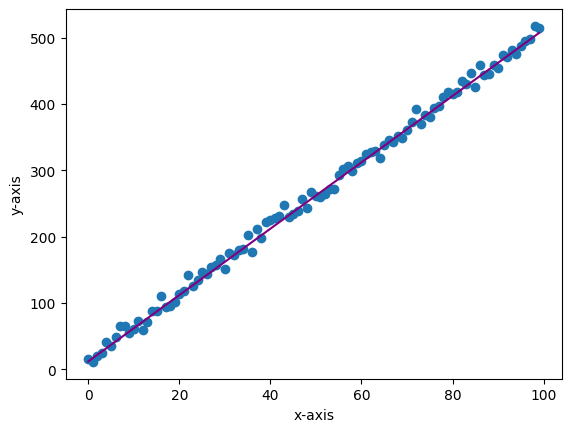

In [10]:
true_weights = [12., 5.]
weights = [1, 1]
x = [i for i in range(0, 100)]
y_true = generateYTrue(x, true_weights, 2.0, 8.5)
drawDataset(x, y_true)
drawTrueFunction(x, true_weights)

In [19]:
def getSinglePredY(weights, x):
    return weights[0] + np.dot(weights[1], x)

def getYPred(weights, x): 
    return [getSinglePredY(weights, i) for i in x]

def getMSE(y_true, y_pred):
    return sum([(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]) / len(y_true)

def getUpdatedWeights(weights, y_true, x, y_pred, learning_rate):
    updated_weights = np.array(weights, copy=True)  
    dMSEda = (-2 * sum([(y_true[i] - y_pred[i]) for i in range(len(y_true))])) / len(y_true)
    dMSEdb = (-2 * sum([ x[i] * (y_true[i] - y_pred[i]) for i in range(len(y_true))])) / len(y_true)
    #print(-dMSEda*learning_rate, -dMSEdb*learning_rate)
    updated_weights[0] -= learning_rate * dMSEda
    updated_weights[1] -= learning_rate * dMSEdb
    return updated_weights

def trainModel(x, y_true, epoch_amount, learning_rate = 0.001):
    MSEs = []
    weights = np.array([1., 1.])
    for i in range(epoch_amount):
        y_pred = getYPred(weights, x)
        MSEs.append(getMSE(y_true, y_pred))
        weights = getUpdatedWeights(weights, y_true, x, y_pred, learning_rate)
        drawMSE(i+1, MSEs)
        #print(i, weights)
    print("trained weights", weights)
    print("true weights", true_weights)

def drawMSE(epoch, MSEs):
    plt.plot([i for i in range(epoch)], MSEs)


trained weights [1.15158123 5.1995744 ]
true weights [12.0, 5.0]


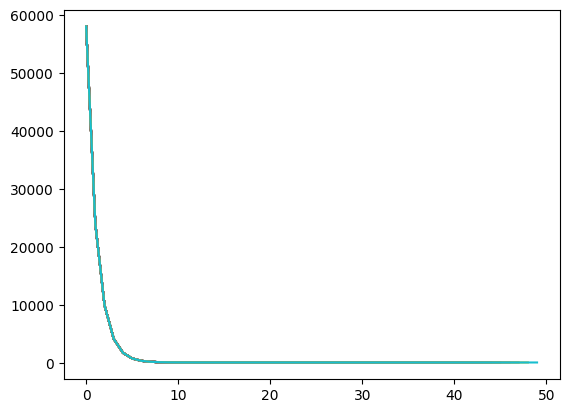

In [20]:
trainModel(x, y_true, 50, 0.00025)